### Parameters
* Simulations were v2.4, used a tau of 4, max pop size fold change of 3, 5e3 generations, random initial driver mutation, CGC driver gene lists, heterozygous mutations 1/10th the effect of homozygous

In [2]:
library(naturalsort)
# library(rasterImage)
library(pracma)
# library(viridis)
# cols1 <- magma(100)

dataDir <- '~/jackgl/Data/Simulations/sims1018/test_colon_1030_tau4/'
ctype <- 'Colon'

# Constant parameters for the simulations:
mu <- 1
sd <- 0.1
sp <- 0.005
N0 <- 500

In [3]:
flst <- naturalsort(list.files(dataDir))
flst <- flst[1:(length(flst)-1)]
length(flst)

[1] 100

#### Load population size time series

In [4]:
Ns <- array(NA,dim=c(length(flst),2e4))

for (ii in 1:length(flst)) {
load(paste0(dataDir,flst[ii]))
N[N==0] <- NA
Ns[ii,] <- N
}
dim(Ns)


[1]   100 20000

#### Calculate statistics over time

In [5]:
Ns_repmean <- apply(Ns,c(2),mean)
Ns_repmed <- apply(Ns,c(2),median)
Ns_repstd <- apply(Ns,c(2),std)

#### Get average number of heterozygous and homozygous driver and passenger mutations per cell

In [6]:
nd_het <- array(NA,dim=c(length(flst),1))
np_het <- array(NA,dim=c(length(flst),1))
nd_hom <- array(NA,dim=c(length(flst),1))
np_hom <- array(NA,dim=c(length(flst),1))

for (ii in 1:length(flst)) {
    load(paste0(dataDir,flst[ii]))
    nd_het[ii] <- sum(Pop$nd_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    np_het[ii] <- sum(Pop$np_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    nd_hom[ii] <- sum(Pop$nd_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
    np_hom[ii] <- sum(Pop$np_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
}


#### Plot smoothed population size time series for all simulations

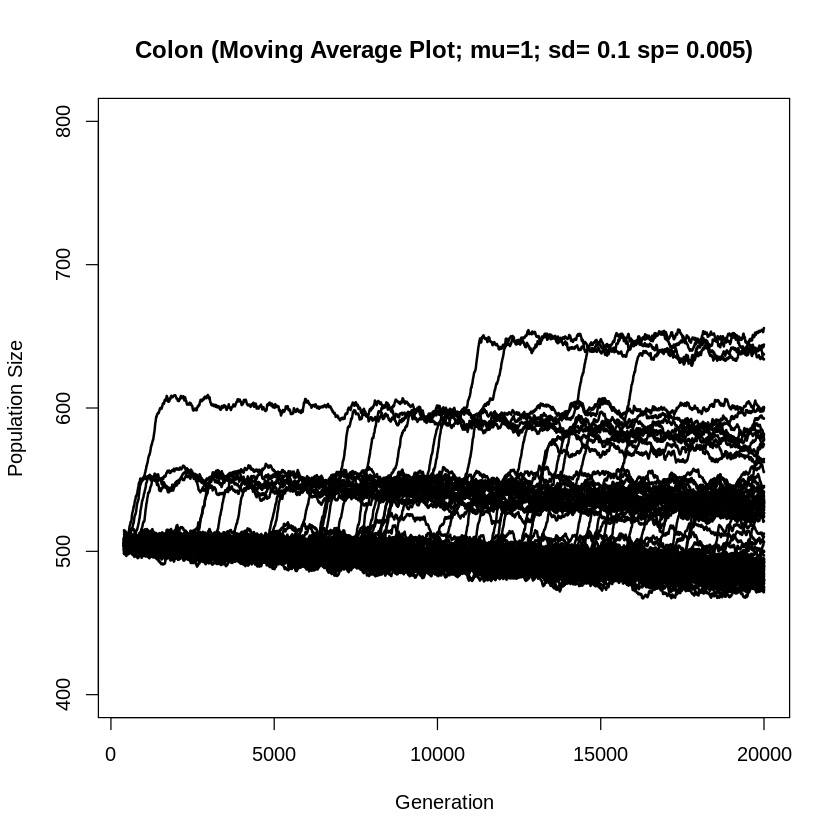

In [7]:
plot(400:length(Ns[1,]),tail(movavg(Ns[1,],400,'s'),19601),type='l',main=paste0(ctype,' (Moving Average Plot; mu=',toString(mu),';',' sd= ',toString(sd),' sp= ',toString(sp),')'),xlab='Generation',ylab='Population Size',lwd=2,ylim=c(400,800))
for (i in 1:length(flst)) {lines(400:length(Ns[i,]),tail(movavg(Ns[i,],400,'s'),19601),type='l',lwd=2)}

#### Get population size fold changes

In [8]:
Ns_fc <- array(NA,dim=c(length(flst),1))

for (ii in 1:length(flst)) {
    tmp <- movavg(Ns[ii,],100,'s')
    Ns_fc[ii] <- tmp[length(which(!is.na(tmp)))]/tmp[1]
}

rm(tmp)
Ns_fc_mean <- mean(Ns_fc)
Ns_fc_med <- median(Ns_fc)
Ns_fc_std <- std(Ns_fc)

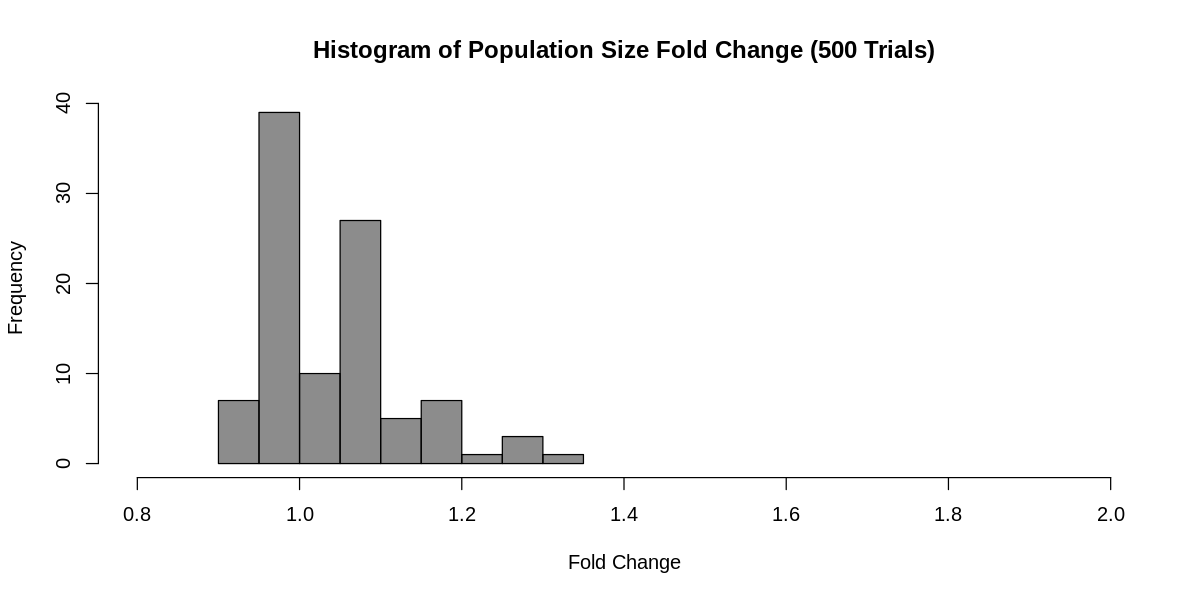

In [9]:
options(repr.plot.width=10, repr.plot.height=5)
hist(Ns_fc,10,xlim=c(0.8,2),
     main='Histogram of Population Size Fold Change (500 Trials)',
     xlab='Fold Change',
     col=rgb(0.1,0.1,0.1,0.5))

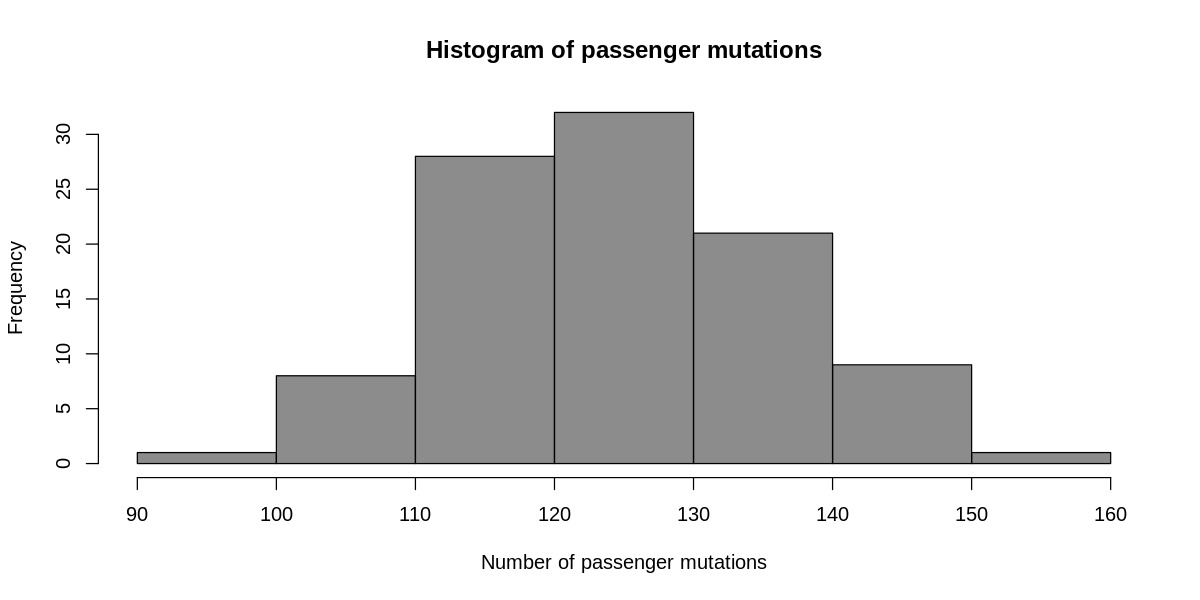

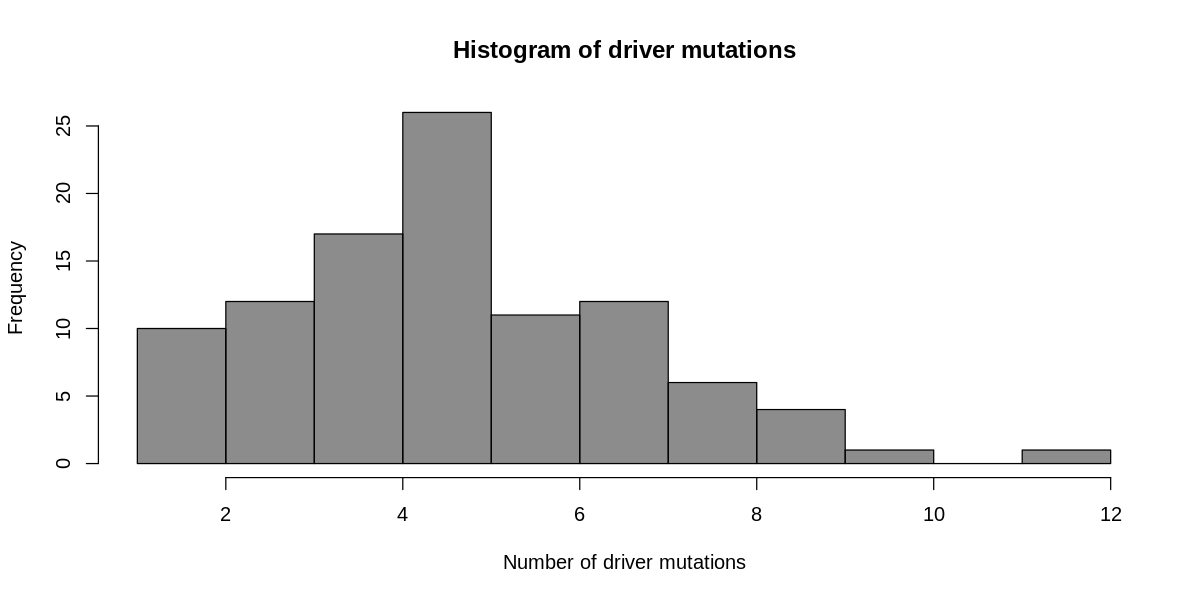

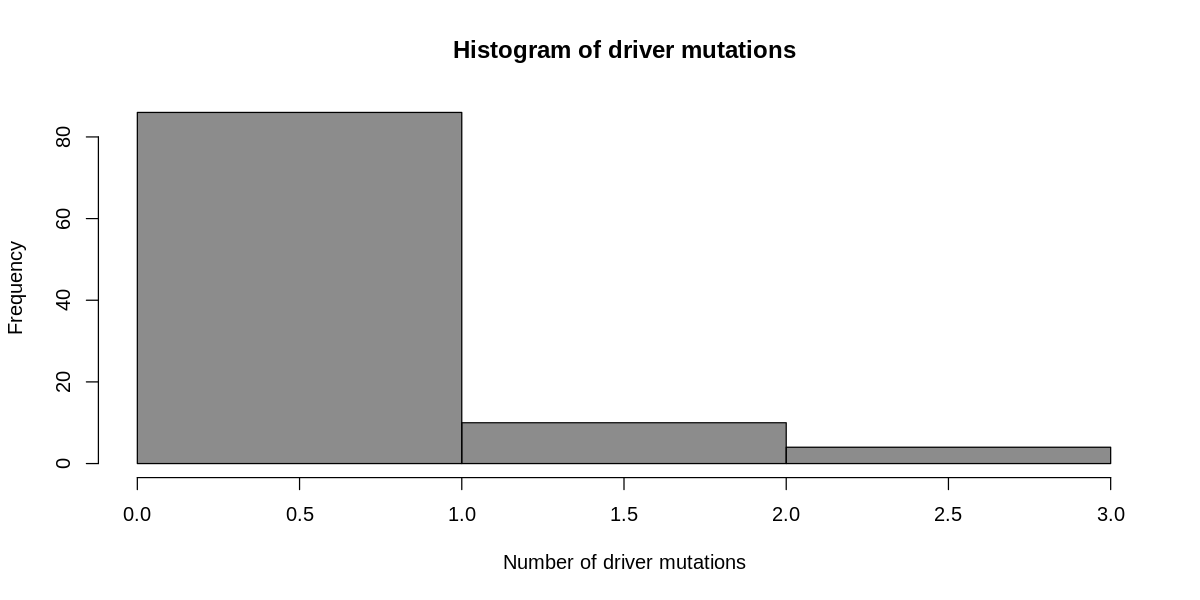

In [10]:
hist((np_het+(np_hom*2)),col=rgb(0.1,0.1,0.1,0.5),
     main='Histogram of passenger mutations',
     xlab='Number of passenger mutations')

hist((nd_het+(nd_hom*2)),col=rgb(0.1,0.1,0.1,0.5),
     main='Histogram of driver mutations',
     xlab='Number of driver mutations')

hist(nd_hom,3,col=rgb(0.1,0.1,0.1,0.5),
     main='Histogram of driver mutations',
     xlab='Number of driver mutations')

#### Frequency of populations with at least one L1 heterzygous driver occurring

In [11]:
length(which((nd_het+(nd_hom*2))>=1))/length(flst)

[1] 1

#### Frequency of populations with at least one L1 homozygous driver occurring

In [12]:
length(which(nd_hom>=1))/length(flst)

[1] 0.49

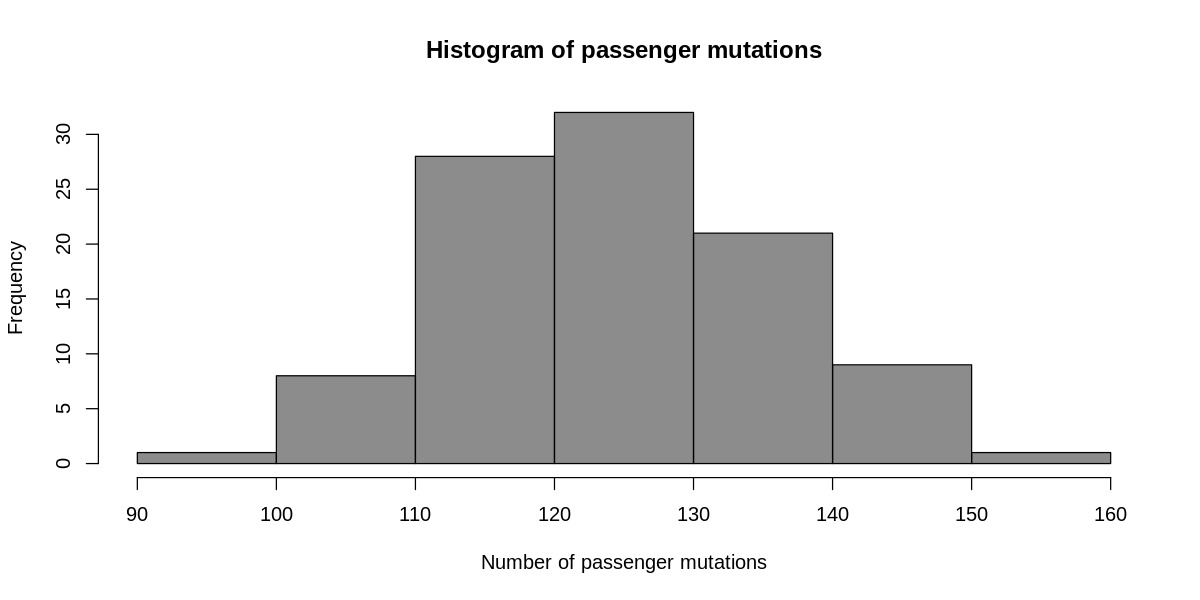

In [13]:
hist((np_het+(np_hom*2)),col=rgb(0.1,0.1,0.1,0.5),
     main='Histogram of passenger mutations',
     xlab='Number of passenger mutations')